In [101]:
import pandas as pd
import numpy as np
import sklearn.decomposition
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('成人收入数据集-预处理后.csv', index_col=0)

In [103]:
data = df[['0','1','2','3','4','5','6','7','8','9','10']]
data = sklearn.decomposition.PCA(n_components=2).fit_transform(np.mat(data))
data = np.mat(data)
data

matrix([[  0.44424101,  -3.01071039],
        [ 11.44374284,  -2.9288406 ],
        [ -0.5877927 ,   1.15066359],
        ...,
        [ 19.40515767,   1.30301524],
        [-16.58706808,   1.03158026],
        [ 13.4054294 ,   1.25835899]])

In [104]:
target = np.array(df['11'])
target

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ...,
       ' Adm-clerical', ' Adm-clerical', ' Exec-managerial'], dtype=object)

In [117]:
x = np.array(data[:,0]).flatten()
y = np.array(data[:,1]).flatten()

In [118]:
dict = {}
for each in target:
    dict[each] = []
dict

{' Adm-clerical': [],
 ' Exec-managerial': [],
 ' Handlers-cleaners': [],
 ' Prof-specialty': [],
 ' Other-service': [],
 ' Sales': [],
 ' Craft-repair': [],
 ' Transport-moving': [],
 ' Farming-fishing': [],
 ' Machine-op-inspct': [],
 ' Tech-support': [],
 ' ?': [],
 ' Protective-serv': [],
 ' Armed-Forces': [],
 ' Priv-house-serv': []}

In [119]:
for index, each in enumerate(target):
    dict[each].append((x[index], y[index]))
dict.pop(' ?')

[(15.416226281553358, 0.17956166880555374),
 (-6.621032264062012, 5.963535349040757),
 (-13.58246034347422, -0.03627685403378847),
 (28.389423642550664, 4.326902521492757),
 (-21.614455771678738, 3.9582646354286752),
 (-3.5876568361583914, 1.1283354644489996),
 (4.41058060443001, 0.10118938242196597),
 (13.41157325437501, 1.254861495078959),
 (29.355806831882713, 8.186269110201403),
 (14.437463117234161, -2.9030149802920073),
 (-19.58693221548394, 1.009252141503156),
 (25.362131840888356, 8.153000781323263),
 (21.383596810258698, 4.278301065845631),
 (-18.582233899513447, -0.07349039245436459),
 (-19.5821886107213, -0.08093310013847989),
 (0.44525392030499034, -3.994013024920311),
 (-19.588332464558327, -0.07743560199680001),
 (-15.577541307627369, -1.0621519476509471),
 (28.39658040253136, 3.340102384442067),
 (-8.577858329172436, -1.0100529938621403),
 (20.443335238318284, -2.861856232328995),
 (-18.593121358113127, 1.0201923473289507),
 (-10.588740063687705, -0.010451232839762745),


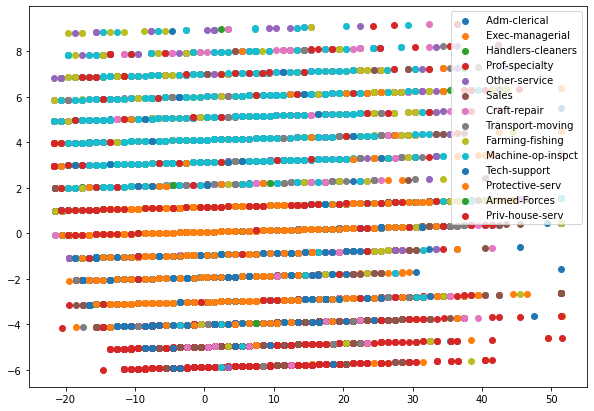

In [120]:
plt.figure(figsize=(10,7))
for each in dict:
    x_list = np.array(np.mat(dict[each])[:,0]).flatten()
    y_list = np.array(np.mat(dict[each])[:,1]).flatten()
    plt.scatter(x_list,y_list,label=each)
plt.legend()

In [131]:
import sklearn.mixture

target_cluster = sklearn.mixture.GaussianMixture(n_components=3).fit_predict(data)
target_cluster

array([1, 1, 1, ..., 2, 0, 2], dtype=int64)

In [132]:
dict = {}
for each in target_cluster:
    dict[each] = []
dict

{1: [], 2: [], 0: []}

In [133]:
for index, each in enumerate(target_cluster):
    dict[each].append((x[index], y[index]))

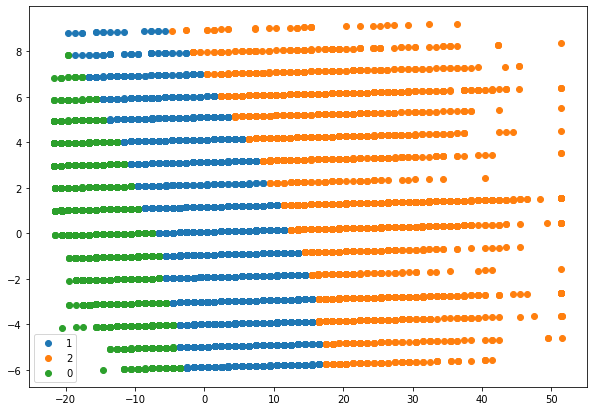

In [134]:
plt.figure(figsize=(10,7))
for each in dict:
    x_list = np.array(np.mat(dict[each])[:,0]).flatten()
    y_list = np.array(np.mat(dict[each])[:,1]).flatten()
    plt.scatter(x_list,y_list,label=each)
plt.legend()
